<a href="https://colab.research.google.com/github/ghumman-shahid/DeepLearning_python/blob/main/BinaryClassification_moviereviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loading IMDB database





In [1]:
from keras.datasets import imdb

In [2]:
(train_data, train_labels),(test_data, test_labels) = imdb.load_data(num_words=10000)


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [3]:
#display(train_data[0])

In [4]:
train_labels[0]

1

In [5]:
max([max(sequence) for sequence in train_data])

9999

In [6]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value,key) for (key,value) in word_index.items()])
decode_review = ' '.join(
    [reverse_word_index.get(i-3,'?') for i in train_data[0] ])

Preparing the Data

In [7]:
import numpy as np

In [8]:
def vectorize_sequences(sequences, dimension=10000):
  results =np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i,sequence] = 1.
    return results

In [9]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [10]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [11]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

Model Definition

In [12]:
from tensorflow.keras import models
from tensorflow.keras import layers

In [13]:
model = models.Sequential()
model.add(layers.Dense(21,activation='relu', input_shape=(10000,)))
model.add(layers.Dense(21,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

Compiling the Model

In [14]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

Configuring the optimizer

Validating your Approach

In [15]:

x_val =x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train= y_train[10000:]

Training your model

In [16]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=21,
                    batch_size=512,
                    validation_data=(x_val, y_val))


Epoch 1/21
30/30 [==============================] - 3s 71ms/step - loss: 0.6932 - acc: 0.4997 - val_loss: 0.6932 - val_acc: 0.4947
Epoch 2/21
30/30 [==============================] - 1s 47ms/step - loss: 0.6932 - acc: 0.4948 - val_loss: 0.6932 - val_acc: 0.4947
Epoch 3/21
30/30 [==============================] - 1s 47ms/step - loss: 0.6931 - acc: 0.5030 - val_loss: 0.6932 - val_acc: 0.4947
Epoch 4/21
30/30 [==============================] - 1s 45ms/step - loss: 0.6932 - acc: 0.4997 - val_loss: 0.6932 - val_acc: 0.4947
Epoch 5/21
30/30 [==============================] - 1s 43ms/step - loss: 0.6931 - acc: 0.5024 - val_loss: 0.6932 - val_acc: 0.4947
Epoch 6/21
30/30 [==============================] - 1s 48ms/step - loss: 0.6931 - acc: 0.5051 - val_loss: 0.6932 - val_acc: 0.4947
Epoch 7/21
30/30 [==============================] - 1s 45ms/step - loss: 0.6931 - acc: 0.5020 - val_loss: 0.6932 - val_acc: 0.4947
Epoch 8/21
30/30 [==============================] - 1s 50ms/step - loss: 0.6931 - a

In [17]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

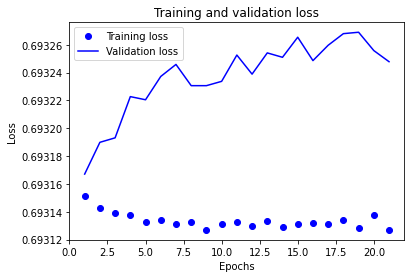

In [18]:
import matplotlib.pyplot as plt
history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = np.arange(1, len(history_dict["acc"]) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

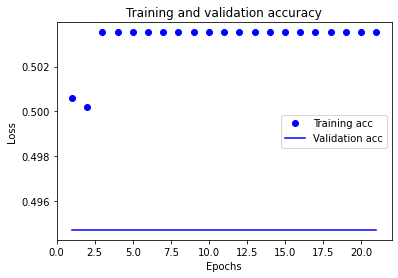

In [19]:
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs, history_dict["acc"], 'bo', label='Training acc')
plt.plot(epochs, history_dict["val_acc"], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [20]:
model.predict(x_test)

array([[0.48557264],
       [0.49657172],
       [0.49657172],
       ...,
       [0.49657172],
       [0.49657172],
       [0.49657172]], dtype=float32)